In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
from prophet import Prophet
from matplotlib import pyplot as plt
import pickle
import asyncio
from datetime import datetime
import json

/Users/catdev/.pyenv/versions/3.8.16/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
weatherData = pd.read_csv('weather_records.csv')
weatherData['createdAt'] = pd.to_datetime(weatherData['createdAt']).dt.tz_localize(None)
# weatherData = weatherData[weatherData['createdAt'] < weatherData['createdAt'].max() - pd.DateOffset(days=3)]
weatherData['weatherRecord'] = weatherData['weatherRecord'].apply(lambda x: json.loads(x))
weatherData.head()

weatherDataWithoutLast7Days = pd.read_csv('weather_records.csv')
weatherDataWithoutLast7Days['createdAt'] = pd.to_datetime(weatherDataWithoutLast7Days['createdAt']).dt.tz_localize(None)
weatherDataWithoutLast7Days = weatherDataWithoutLast7Days[weatherDataWithoutLast7Days['createdAt'] < weatherDataWithoutLast7Days['createdAt'].max() - pd.DateOffset(days=7)]
weatherDataWithoutLast7Days['weatherRecord'] = weatherDataWithoutLast7Days['weatherRecord'].apply(lambda x: json.loads(x))
weatherDataWithoutLast7Days.head()

,id,createdAt,weatherRecord,weatherStationId
480935,596388,2023-05-06 23:15:28.042,"{'humidityFromDTH22': 56.29999924, 'pressureFr...",b92047e5-b481-4374-9fde-12eb295bf373
480936,596387,2023-05-06 23:15:26.004,"{'humidityFromDTH22': 56.29999924, 'pressureFr...",b92047e5-b481-4374-9fde-12eb295bf373
480937,596386,2023-05-06 23:15:23.988,"{'humidityFromDTH22': 56.29999924, 'pressureFr...",b92047e5-b481-4374-9fde-12eb295bf373
480938,596385,2023-05-06 23:15:21.974,"{'humidityFromDTH22': 56.29999924, 'pressureFr...",b92047e5-b481-4374-9fde-12eb295bf373
480939,596384,2023-05-06 23:15:19.958,"{'humidityFromDTH22': 56.29999924, 'pressureFr...",b92047e5-b481-4374-9fde-12eb295bf373


WARNING - (py.warnings._showwarnmsg) - /var/folders/v6/951mtttj5td6mtjktxlnlqjh0000gn/T/ipykernel_5461/462792944.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



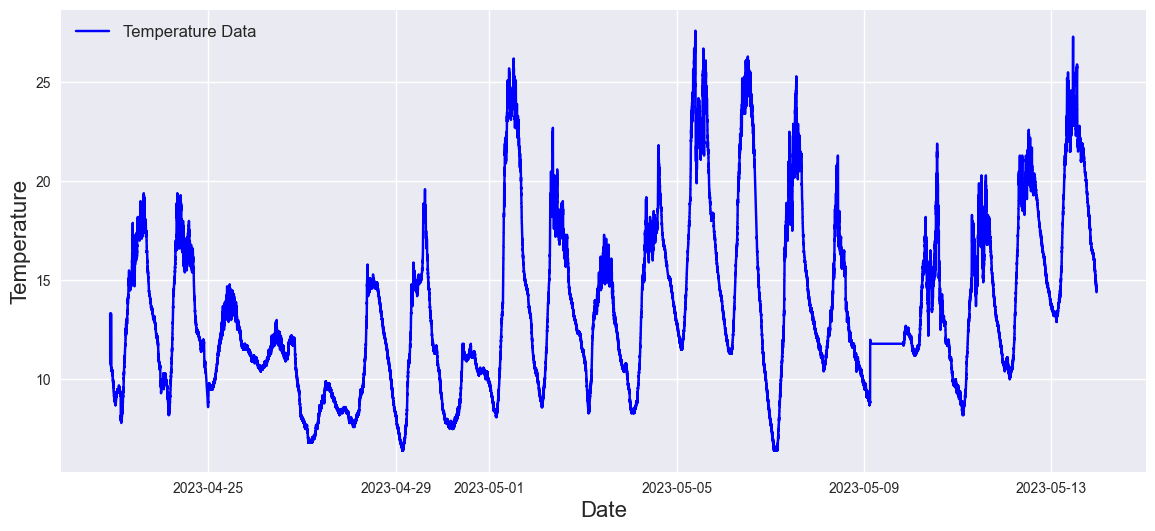

In [3]:
import matplotlib.pyplot as plt

# Splitting the data into training (80%) and testing (20%)
train_data = weatherData


# Setting up the figure size and style
plt.figure(figsize=(14, 6))
plt.style.use('seaborn')

# Plotting the training data
plt.plot(weatherData['createdAt'], weatherData['weatherRecord'].apply(lambda x: x['temperatureFromDTH22'] if x['temperatureFromDTH22'] <= 200000 else None), color='blue', label='Temperature Data')




# Customizing the plot
# plt.title("Temperature Data", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Adding a shaded area between the two data sets
# plt.fill_between(train_data['createdAt'], train_data['weatherRecord'].apply(lambda x: x['temperatureFromDTH22'] if x['temperatureFromDTH22'] <= 200000 else None), color='pink', alpha=0.3)

# Displaying the plot
plt.show()


WARNING - (py.warnings._showwarnmsg) - /var/folders/v6/951mtttj5td6mtjktxlnlqjh0000gn/T/ipykernel_5461/3834598377.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



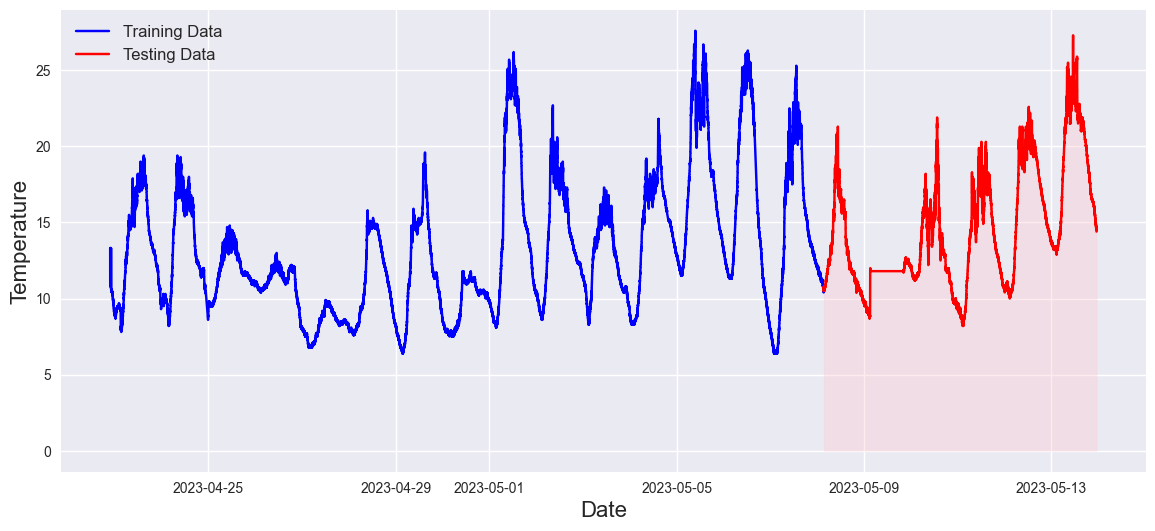

In [4]:
import matplotlib.pyplot as plt

# Splitting the data into training (80%) and testing (20%)
train_data = weatherData.iloc[:int(len(weatherData) * 0.4)]
test_data = weatherData.iloc[int(len(weatherData) * 0.4):]

# Setting up the figure size and style
plt.figure(figsize=(14, 6))
plt.style.use('seaborn')

# Plotting the training data
plt.plot(test_data['createdAt'], test_data['weatherRecord'].apply(lambda x: x['temperatureFromDTH22'] if x['temperatureFromDTH22'] <= 200000 else None), color='blue', label='Training Data')

# Plotting the testing data
plt.plot(train_data['createdAt'], train_data['weatherRecord'].apply(lambda x: x['temperatureFromDTH22'] if x['temperatureFromDTH22'] <= 200000 else None), color='red', label='Testing Data')

# Customizing the plot
# plt.title("Temperature Data", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Adding a shaded area between the two data sets
plt.fill_between(train_data['createdAt'], train_data['weatherRecord'].apply(lambda x: x['temperatureFromDTH22'] if x['temperatureFromDTH22'] <= 200000 else None), color='pink', alpha=0.3)

# Displaying the plot
plt.show()


In [57]:
# Generate temperature data
hours = ['08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00']
temperature_data = [28.5, 29.3, 30.1, 31.7, 33.2, 34.8, 35.2, 35.6, 34.9, 33.6]
weatherData10Records = pd.DataFrame({'createdAt': hours, 'temperatureFromDTH22': temperature_data})
weatherData10Records

,createdAt,temperatureFromDTH22
0,08:00,28.5
1,09:00,29.3
2,10:00,30.1
3,11:00,31.7
4,12:00,33.2
5,13:00,34.8
6,14:00,35.2
7,15:00,35.6
8,16:00,34.9
9,17:00,33.6


WARNING - (py.warnings._showwarnmsg) - /var/folders/v6/951mtttj5td6mtjktxlnlqjh0000gn/T/ipykernel_5461/3694822886.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



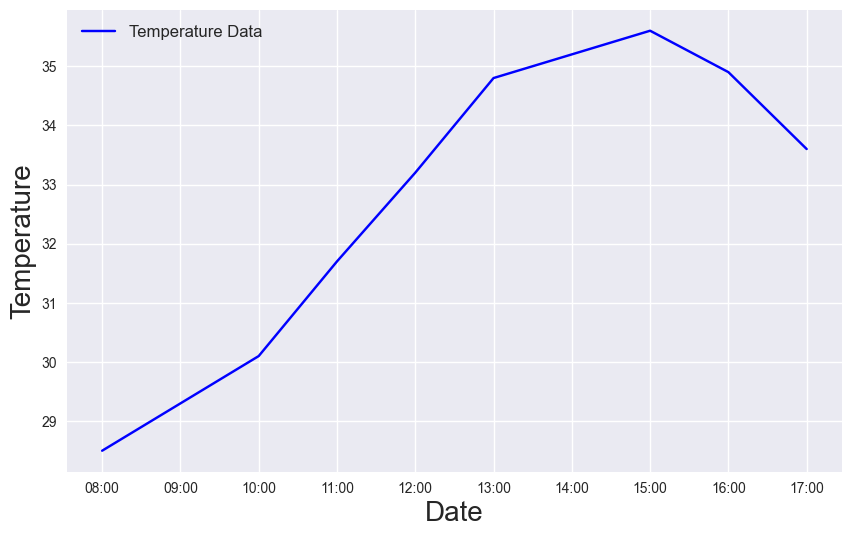

In [17]:
import matplotlib.pyplot as plt



# Setting up the figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')

# Plotting the training data
plt.plot(weatherData10Records['createdAt'], weatherData10Records['temperatureFromDTH22'], color='blue', label='Temperature Data')




# Customizing the plot
# plt.title("Temperature Data", fontsize=16)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Temperature", fontsize=20)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)



# Displaying the plot
plt.show()


WARNING - (py.warnings._showwarnmsg) - /var/folders/v6/951mtttj5td6mtjktxlnlqjh0000gn/T/ipykernel_5461/643534048.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



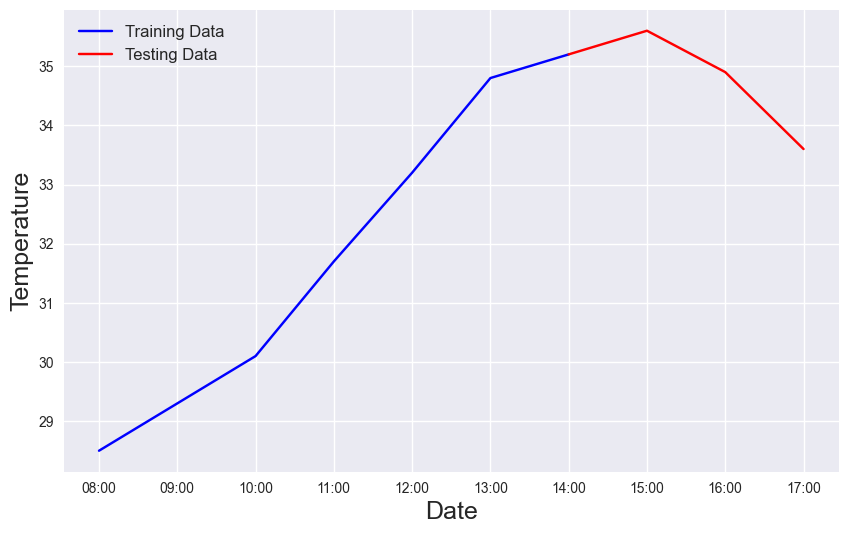

In [56]:
# Splitting the data into training (80%) and testing (20%)
train_data = weatherData10Records.iloc[:(7)]
test_data = weatherData10Records.iloc[(6):]

# Setting up the figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')

# Plotting the training data
plt.plot(train_data['createdAt'], train_data['temperatureFromDTH22'], color='blue', label='Training Data')

# Plotting the testing data
plt.plot(test_data['createdAt'], test_data['temperatureFromDTH22'], color='red', label='Testing Data')

# Customizing the plot
plt.xlabel("Date", fontsize=18)
plt.ylabel("Temperature", fontsize=18)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# plt.fill_between(test_data['createdAt'], test_data['temperatureFromDTH22'], color='pink', alpha=0.5)

# Displaying the plot
plt.show()